# Sentiment analysis
We analyze the sentiment in the essays. Therefore, we compare the compound score of the essays with respect to the average scores of all essay types. We also compare the sum of the generated essays with the student essays. Then we compare the difference between them.

In [3]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import config

path = config.system_path
plt.rcParams["figure.figsize"] = (config.fig_x, config.fig_y)

sid = SentimentIntensityAnalyzer()
essays = pd.read_csv(path + "preprocessed_data.csv", sep=";", encoding="UTF-8")

sentiments = [[]]

# Return compound poliarity score of essays
def get_sentiment(essay):
    ss = sid.polarity_scores(essay)
    return(ss.get('compound'))

def plot_smooth(x, y, label, color):
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = label, color = color)

def plot_not_smooth(x, y, label, color):
    plt.plot(x, y, label = label, color = color)

# Calculating sentiment score
essays["Student Essay sentiment score"] = essays["Student Essay"].apply(lambda x: get_sentiment(x))
essays["ChatGPT Essay 0.2 sentiment score"] = essays["ChatGPT Essay 0.2"].apply(lambda x: get_sentiment(x))
essays["ChatGPT Essay 0.9 sentiment score"] = essays["ChatGPT Essay 0.9"].apply(lambda x: get_sentiment(x))

average_score_chatgpt = (np.array(essays["ChatGPT Essay 0.2 sentiment score"]) + np.array(essays["ChatGPT Essay 0.9 sentiment score"])) / 2
difference = np.array(essays["Student Essay sentiment score"]) - average_score_chatgpt


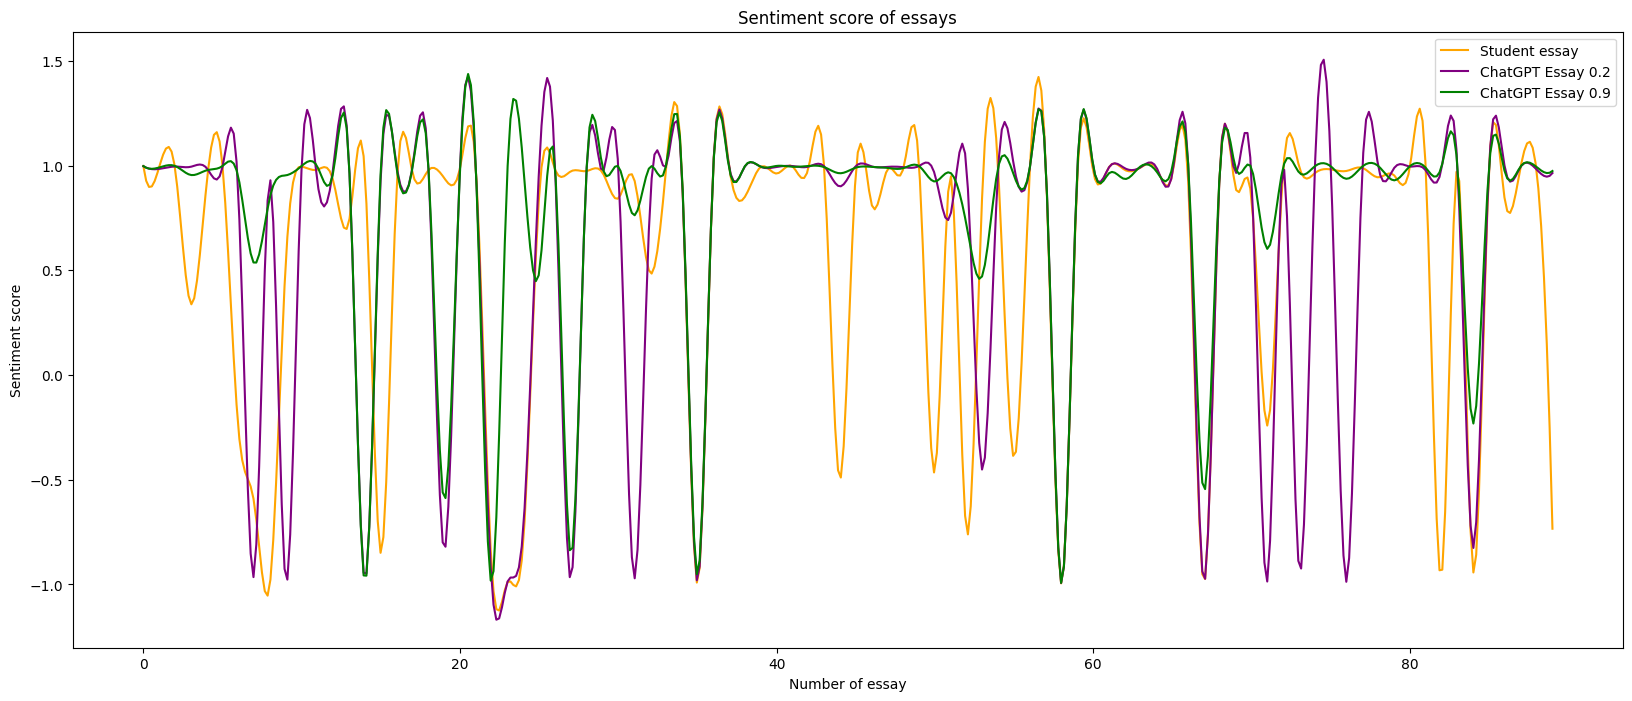

In [4]:
plot_smooth(essays["Unnamed: 0"], essays["Student Essay sentiment score"], "Student essay", "orange")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.2 sentiment score"], "ChatGPT Essay 0.2", "purple")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.9 sentiment score"], "ChatGPT Essay 0.9", "green")
plt.xlabel("Number of essay")
plt.ylabel("Sentiment score")
plt.title("Sentiment score of essays")
plt.legend()
plt.show()


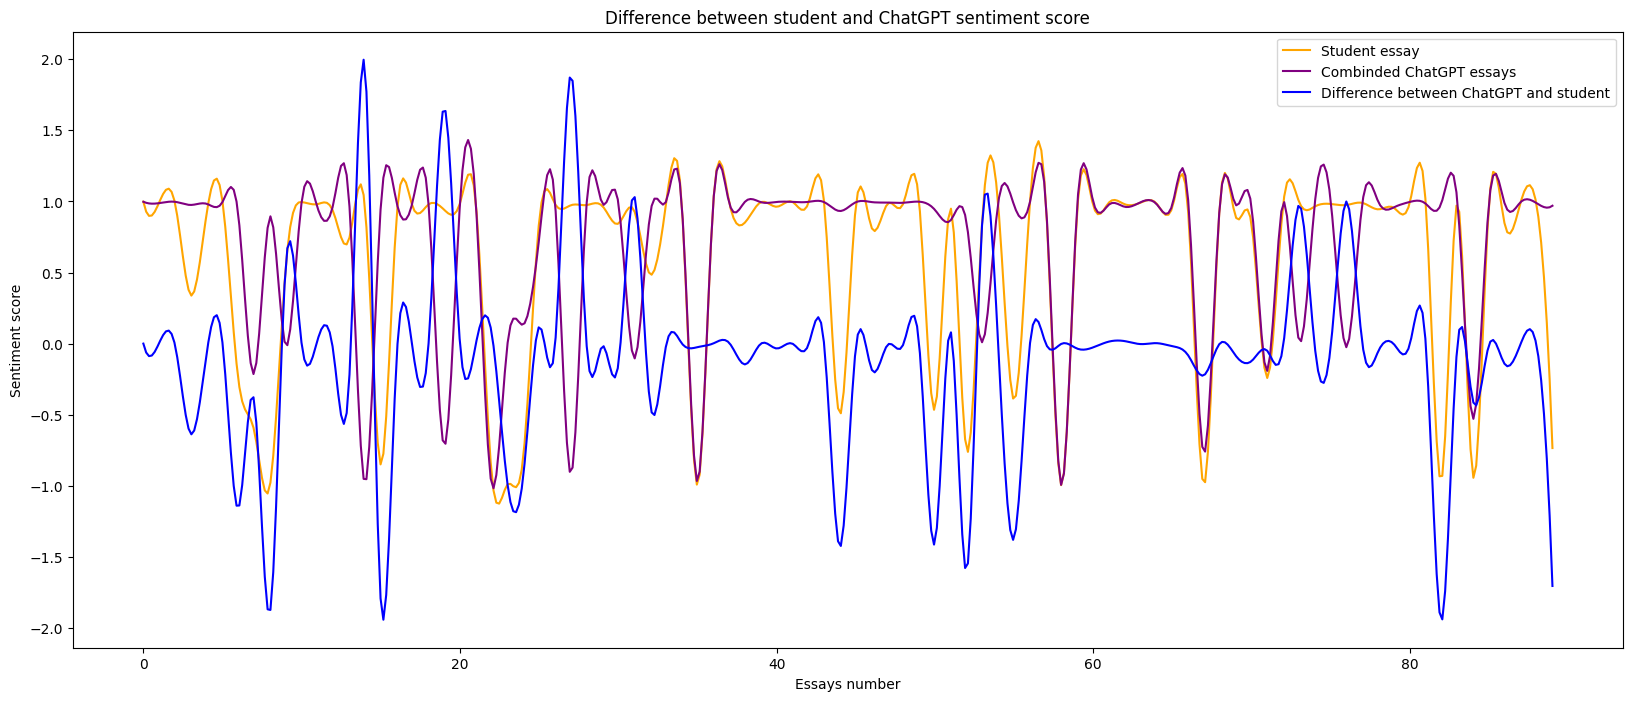

In [5]:
plot_smooth(essays["Unnamed: 0"], essays["Student Essay sentiment score"], "Student essay", "orange")
plot_smooth(essays["Unnamed: 0"], average_score_chatgpt, "Combinded ChatGPT essays", "purple")
plot_smooth(essays["Unnamed: 0"], difference, "Difference between ChatGPT and student", "blue")
plt.xlabel("Essays number")
plt.ylabel("Sentiment score")
plt.title("Difference between student and ChatGPT sentiment score")
plt.legend()
plt.show()
